## 데이터 shuffle

In [4]:
import numpy as np

# 데이터 생성
index = np.arange(49)
print(index)

# 데이터 shuffle
index_shuffle = np.random.shuffle(index)
print(index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[46 25  1 36  3 48 18 34 32 13 20 45 19 31 16 43  2 42  6 27 12 28 47 41
 14 30  8  0  4 44 21  7 40 33 22 39 15 11 37 35 24 23  5 26 29 17  9 38
 10]


## 데이터 준비

In [8]:
# 두 특성을 하나의 numpy로 만들기 - 열을 기준으로
length = np.array([1,2,3,4,5])
weight = np.array([10,20,30,40,50])
target = np.array([1,1,1,0,0])
data = np.column_stack((length, weight))
print(data)

concat_data = np.concatenate((np.ones(35), np.zeros(14)))
print(concat_data)

[[ 1 10]
 [ 2 20]
 [ 3 30]
 [ 4 40]
 [ 5 50]]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## sklearn library를 통한 데이터 split

In [11]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, stratify=target)
print(train_input)
print(train_target)

[[ 2 20]
 [ 3 30]
 [ 5 50]]
[1 1 0]


## sklearn library classification exmaple

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split

data_length = np.array([10,12,13,15,18,20,21,15,23,24,30,31,32,42,33,47,34,41,36,45])
data_weight = np.array([100,120,130,150,180,200,210,150,230,240,300,301,302,402,303,407,304,401,306,405])

data = np.column_stack((data_length, data_weight))
data_target = np.concatenate((np.ones(10), np.zeros(10)))
train_data, test_data, train_target, test_target = train_test_split(data, data_target,stratify=data_target)

print("train_Data :" , train_data)
print("test_Data :" , test_data)

train_Data : [[ 15 150]
 [ 41 401]
 [ 31 301]
 [ 20 200]
 [ 36 306]
 [ 12 120]
 [ 24 240]
 [ 21 210]
 [ 33 303]
 [ 47 407]
 [ 18 180]
 [ 34 304]
 [ 13 130]
 [ 42 402]
 [ 45 405]]
test_Data : [[ 23 230]
 [ 10 100]
 [ 30 300]
 [ 32 302]
 [ 15 150]]


In [31]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_data, train_target)
result = knn.score(test_data, test_target)
print(result*100, end="%")

100.0%

Text(0, 0.5, 'weight')

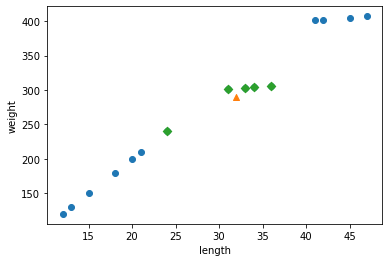

In [44]:
from matplotlib import pyplot as plt

predictable_data = np.array([[32,290]])
dist, idx = knn.kneighbors([[32,290]])
plt.scatter(train_data[:,0], train_data[:,1])
plt.scatter(predictable_data[0][0],predictable_data[0][1], marker='^')
plt.scatter(train_data[idx, 0], train_data[idx,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

## 길이, 무게값 정규화로 다시 진행

In [81]:
from sklearn.preprocessing import StandardScaler

predictable_data = np.array([[32,290]])

scaler = StandardScaler()
scaler.fit(train_data) # Train data에서의 평균, 표준편차를 기준으로 하려니깐 fit은 한 번만!
transformed_train_data = scaler.transform(train_data)
transformed_test_data = scaler.transform(test_data)
transformed_predictable_data = scaler.transform(predictable_data)
print("------------train data-----------------")
print(transformed_data)
print("------------test data-----------------")
print(transformed_test_data)
print("---------predictable data--------------")
print(transformed_predictable_data )

------------train data-----------------
[[-1.18965517 -1.2056962 ]
 [ 1.05172414  1.30367152]
 [ 0.18965517  0.30392342]
 [-0.75862069 -0.70582216]
 [ 0.62068966  0.35391083]
 [-1.44827586 -1.50562063]
 [-0.4137931  -0.30592292]
 [-0.67241379 -0.60584735]
 [ 0.36206897  0.32391838]
 [ 1.56896552  1.3636564 ]
 [-0.93103448 -0.90577177]
 [ 0.44827586  0.33391586]
 [-1.36206897 -1.40564582]
 [ 1.13793103  1.313669  ]
 [ 1.39655172  1.34366144]]
------------test data-----------------
[[-0.5        -0.40589773]
 [-1.62068966 -1.70557025]
 [ 0.10344828  0.29392594]
 [ 0.27586207  0.3139209 ]
 [-1.18965517 -1.2056962 ]]
---------predictable data--------------
[[0.27586207 0.19395113]]


In [82]:
knn = KNeighborsClassifier()
knn.fit(transformed_train_data, train_target)
result = knn.score(transformed_test_data, test_target)
print(result*100, end="%")

100.0%

Text(0, 0.5, 'weight')

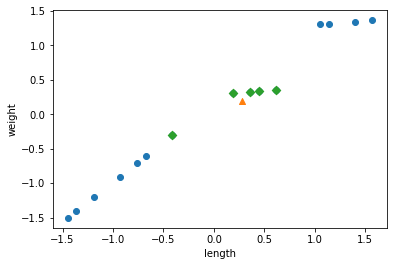

In [83]:
from matplotlib import pyplot as plt

dist, idx = knn.kneighbors(transformed_predictable_data)
plt.scatter(transformed_train_data[:,0], transformed_train_data[:,1])
plt.scatter(transformed_predictable_data[0][0],transformed_predictable_data[0][1], marker='^')
plt.scatter(transformed_train_data[idx, 0], transformed_train_data[idx,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')